In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder,StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [155]:
data = pd.read_csv('Training Dataset.csv')

In [156]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [158]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [159]:
# find feature which consists null value
for i in data.columns:
    if(data[i].isna().sum()>0):
        print(i ,data[i].isna().sum() )

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [160]:
# Fill Missing values
mv = SimpleImputer(strategy='most_frequent')
data['Gender'] = mv.fit_transform(data[['Gender']])

In [161]:
data['Married'].head(3)

0     No
1    Yes
2    Yes
Name: Married, dtype: object

In [162]:
mv = SimpleImputer(strategy='most_frequent')
data['Married'] = mv.fit_transform(data[['Married']])

In [163]:
data['Dependents'].head(3)

0    0
1    1
2    0
Name: Dependents, dtype: object

In [164]:
mv = SimpleImputer(strategy='most_frequent')
data['Dependents'] = mv.fit_transform(data[['Dependents']])

In [165]:
data['Self_Employed'].head(3)

0     No
1     No
2    Yes
Name: Self_Employed, dtype: object

In [166]:
mv = SimpleImputer(strategy='most_frequent')
data['Self_Employed'] = mv.fit_transform(data[['Self_Employed']])

In [167]:
data['LoanAmount'].head(3)

0      NaN
1    128.0
2     66.0
Name: LoanAmount, dtype: float64

In [168]:
mv = SimpleImputer(strategy='mean')
data['LoanAmount'] = mv.fit_transform(data[['LoanAmount']])

In [169]:
data['Loan_Amount_Term'].mean()

342.0

In [170]:
mv = SimpleImputer(strategy='mean')
data['Loan_Amount_Term'] = mv.fit_transform(data[['Loan_Amount_Term']])

In [171]:
data['Credit_History'].head(4)

0    1.0
1    1.0
2    1.0
3    1.0
Name: Credit_History, dtype: float64

In [172]:
mv = SimpleImputer(strategy='most_frequent')
data['Credit_History'] = mv.fit_transform(data[['Credit_History']])

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [174]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_34124\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

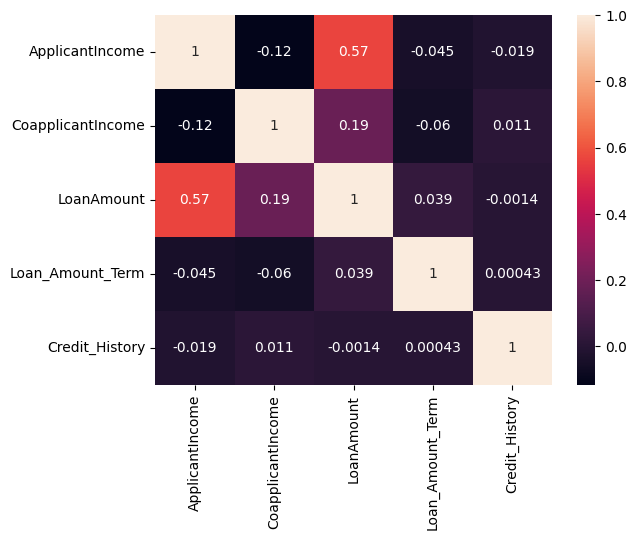

In [175]:
sns.heatmap(data.corr(),annot=True)

In [176]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [177]:
data.drop('Loan_ID',axis=1,inplace=True)

In [178]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [179]:
# convert the category to numberica form
ct = data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]

In [180]:
kl = OrdinalEncoder()

In [181]:
for i in ct.columns:
    ct[i] = kl.fit_transform(ct[[i]])

C:\Users\HP\AppData\Local\Temp\ipykernel_34124\1255752556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct[i] = kl.fit_transform(ct[[i]])
C:\Users\HP\AppData\Local\Temp\ipykernel_34124\1255752556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct[i] = kl.fit_transform(ct[[i]])
C:\Users\HP\AppData\Local\Temp\ipykernel_34124\1255752556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [182]:
ct

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,2.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2.0,1.0
4,1.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1.0
610,1.0,1.0,0.0,0.0,0.0,1.0
611,1.0,1.0,0.0,0.0,2.0,1.0
612,1.0,1.0,0.0,0.0,2.0,1.0


In [183]:
data.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1, inplace=True)

In [184]:
data = pd.concat([data,ct],axis=1)

In [185]:
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0,5849,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0,3000,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
610,3+,4106,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
611,1,8072,240.0,253.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0
612,2,7583,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0


In [191]:
f =data['Dependents'].mode()
for i in range(len(data['Dependents'])):
    if(data['Dependents'][i]=='3+'):
        data['Dependents'][i]='0'
        
    
  

In [192]:
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0,5849,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0,3000,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
610,0,4106,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
611,1,8072,240.0,253.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0
612,2,7583,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0


In [193]:
data.isna().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

<Axes: xlabel='Gender', ylabel='Loan_Status'>

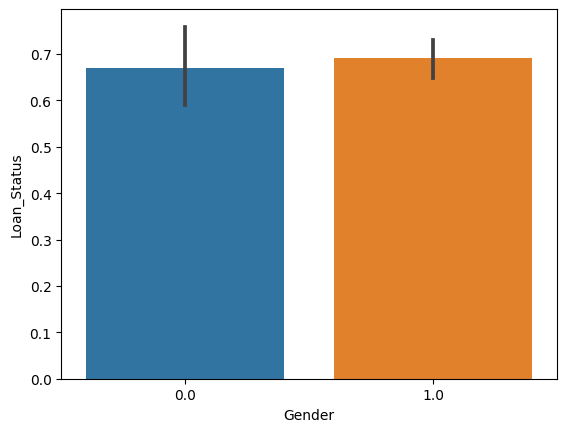

In [194]:
sns.barplot(x='Gender',y='Loan_Status',data=data)

In [195]:
data.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

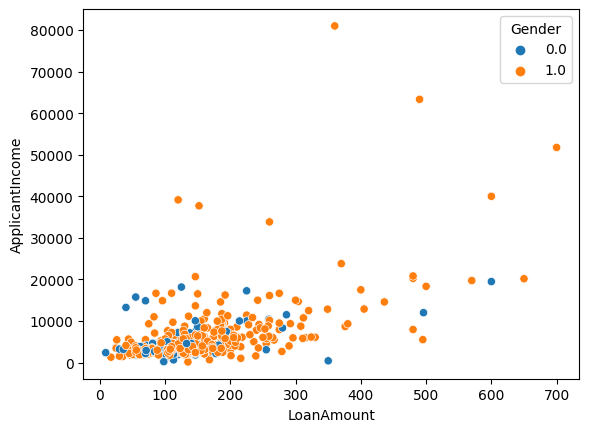

In [196]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Gender',data=data)

C:\Users\HP\AppData\Local\Temp\ipykernel_34124\4233452927.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

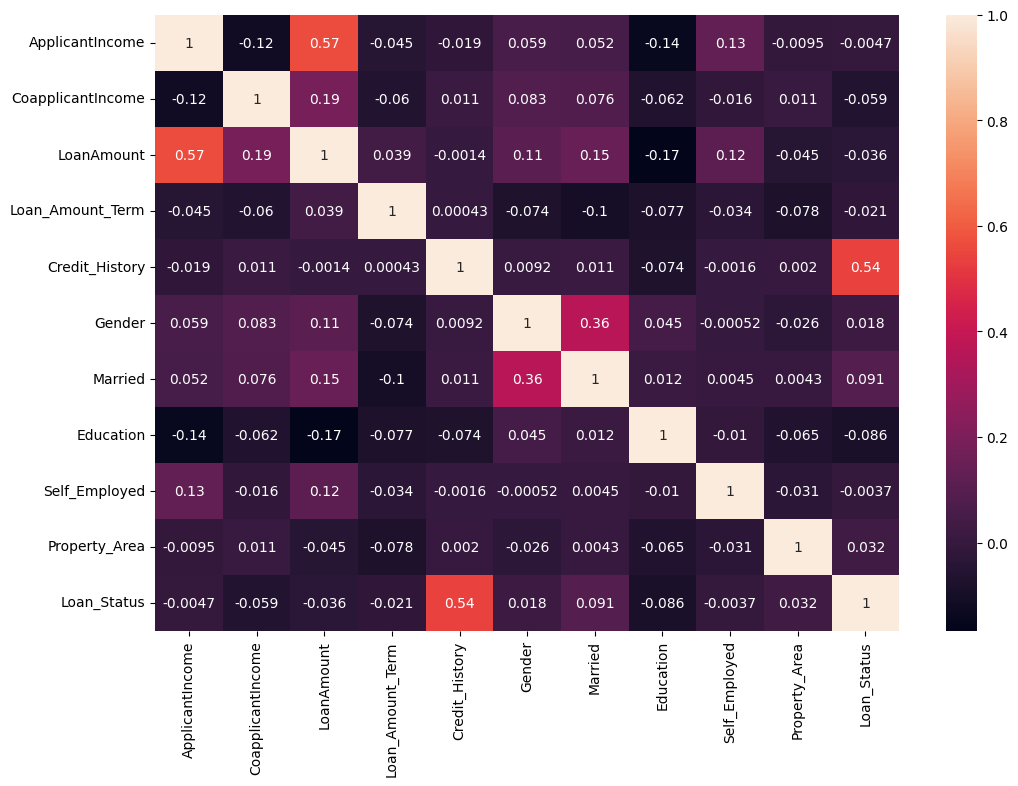

In [212]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(),annot=True)

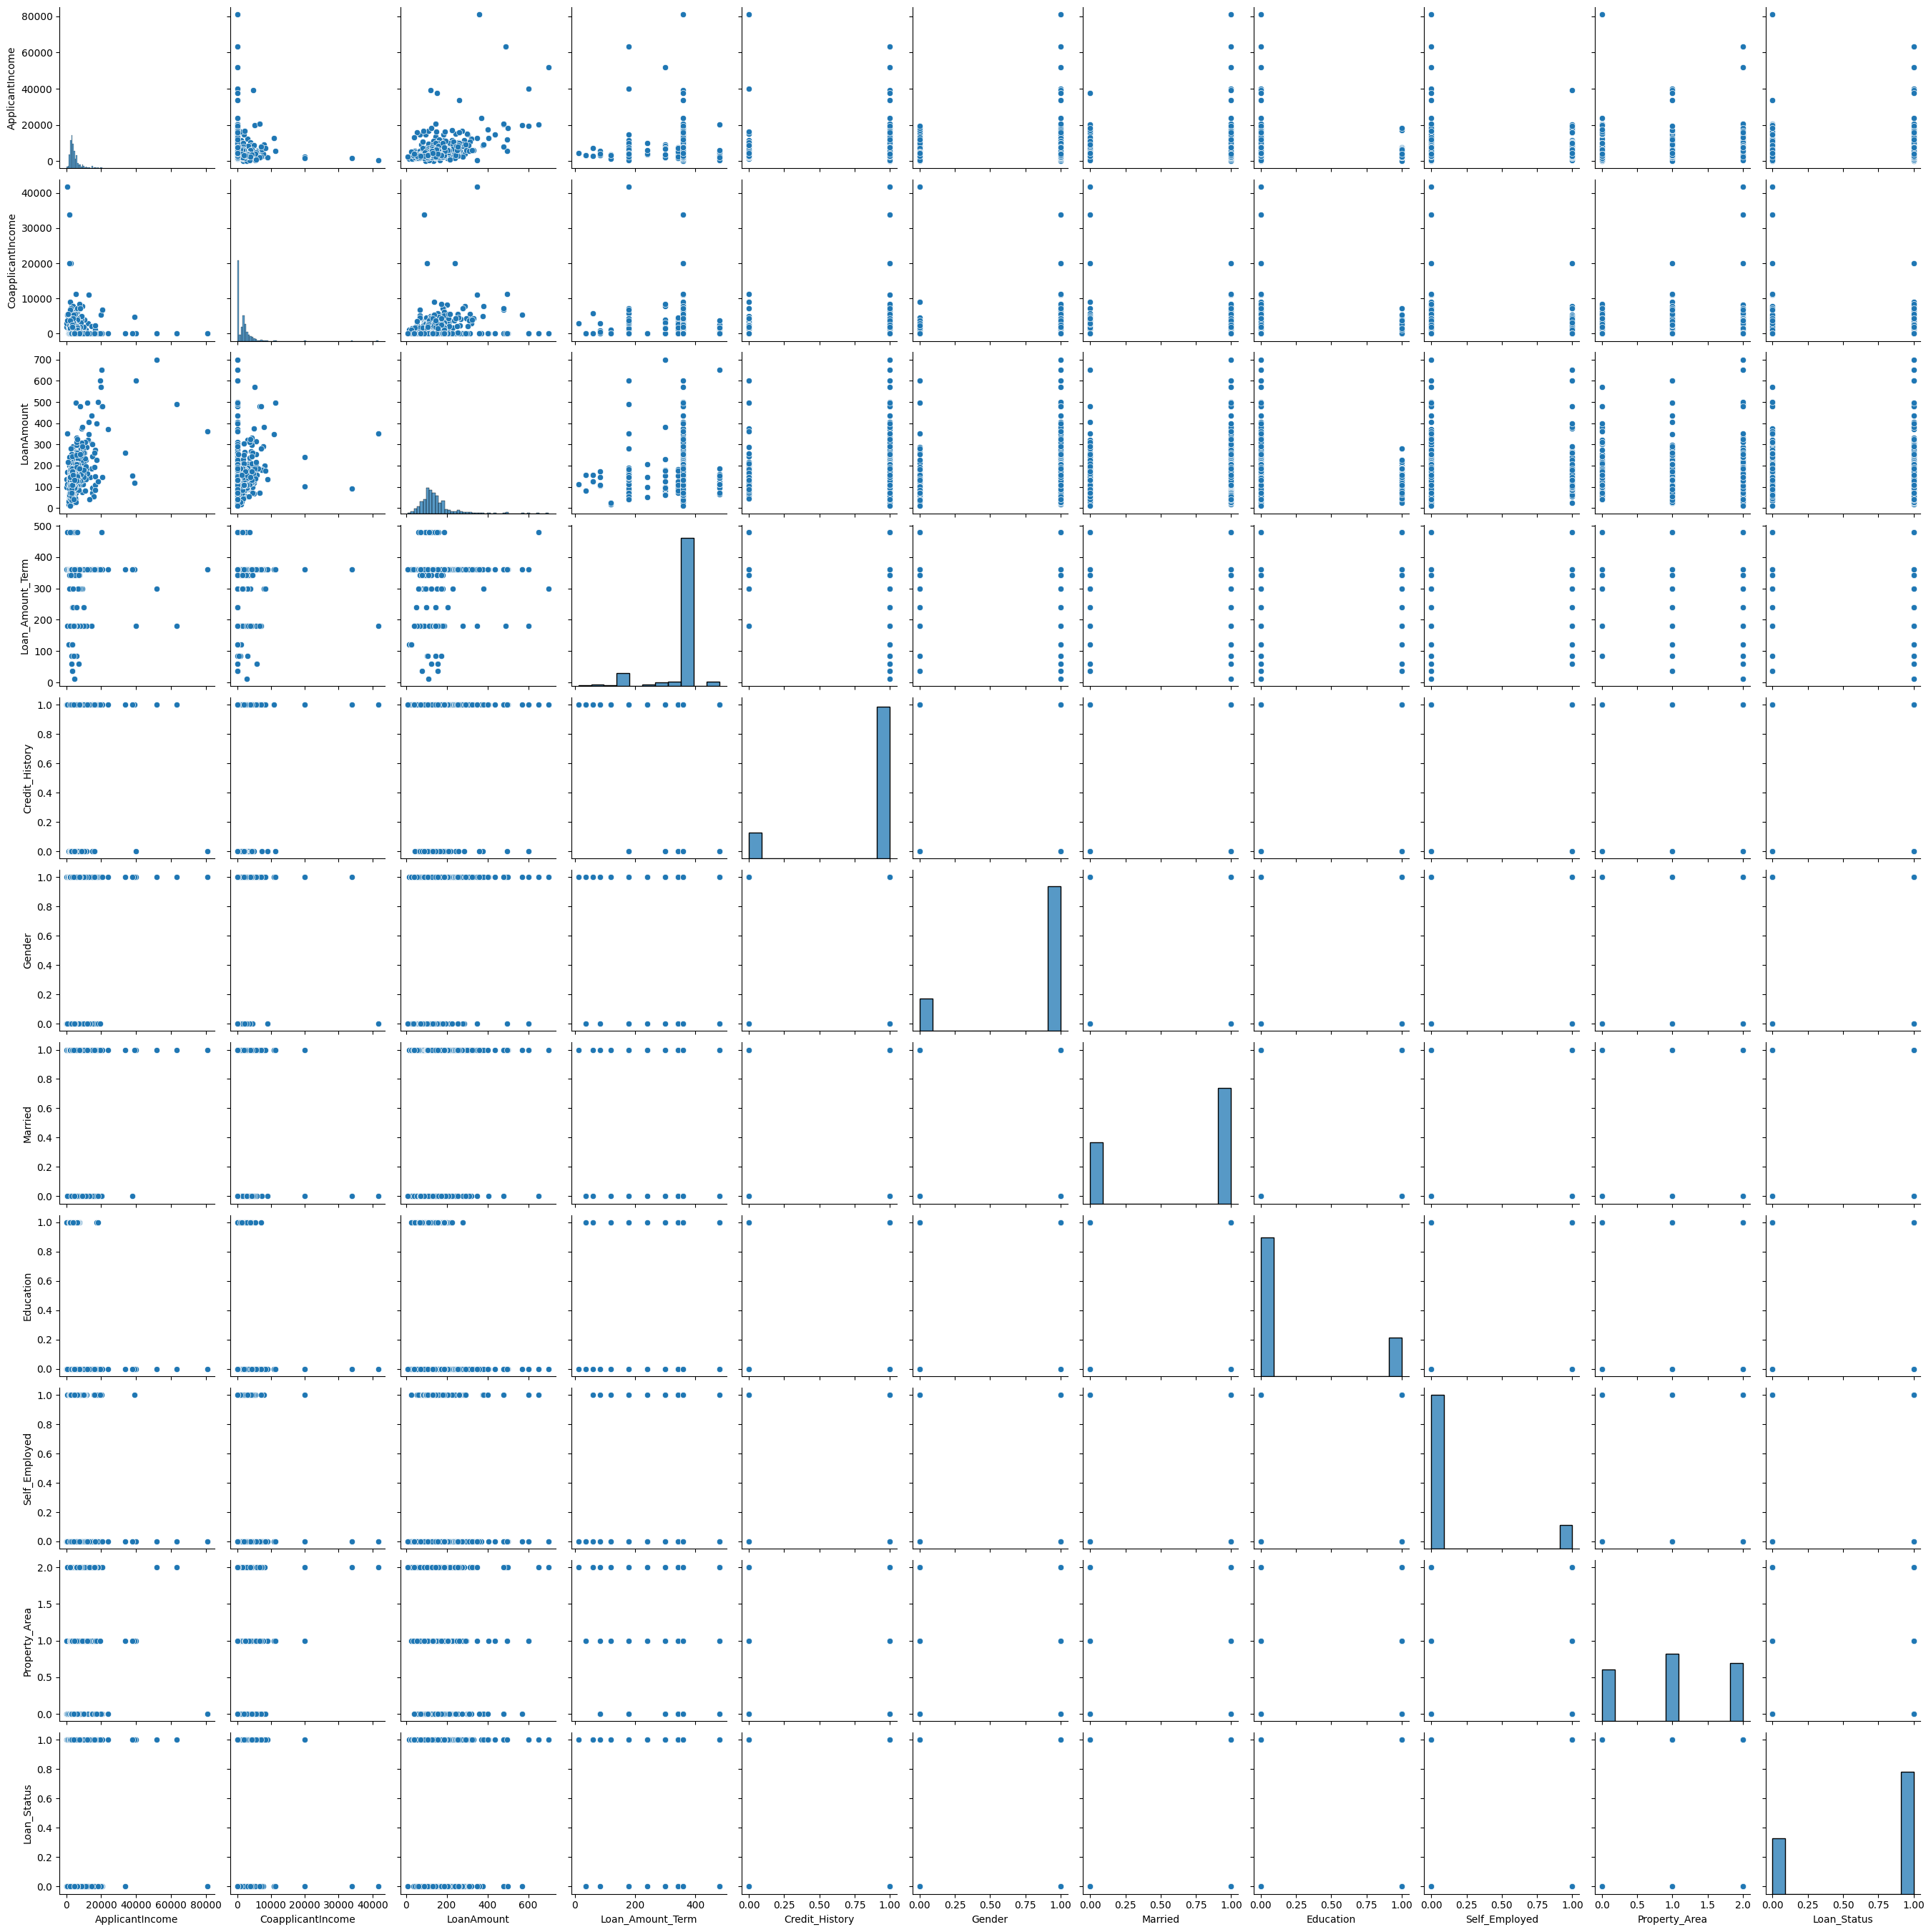

In [112]:
sns.pairplot(data)

In [113]:
# splitting

In [199]:
x = data.drop(['Loan_Status' ,'',axis=1)
y = data['Loan_Status']

In [200]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
0,0,5849,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,2.0
1,1,4583,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0,3000,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,2.0
3,0,2583,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0
4,0,6000,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0
610,0,4106,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,0.0
611,1,8072,240.0,253.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0
612,2,7583,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0


In [201]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [202]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [203]:
scaler = StandardScaler()

In [204]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [207]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [209]:
y_pred = model.predict(x_test)

In [210]:
accuracy_score(y_test,y_pred)

0.7837837837837838

In [211]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7837837837837838
Confusion Matrix:
[[ 27  38]
 [  2 118]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.42      0.57        65
         1.0       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

